In [21]:
import numpy as np
import pandas as pd
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn, optim
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [ ]:

from sklearn.neural_network import MLPClassifier





In [81]:
x_train = pd.read_csv("C:\SMLProject\data\X_train.csv\X_train.csv")
y_train = pd.read_csv("C:\SMLProject\data\y_train.csv")

In [51]:
print(x_train.isnull().sum())

x_train.describe()
# Has orientation, velocity, and acceleration in all  three axis.

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64


,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792262,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


series_id    0
group_id     0
surface      0
dtype: int64
         series_id     group_id
count  3810.000000  3810.000000
mean   1904.500000    37.601312
std    1099.996591    20.982743
min       0.000000     0.000000
25%     952.250000    19.000000
50%    1904.500000    39.000000
75%    2856.750000    55.000000
max    3809.000000    72.000000


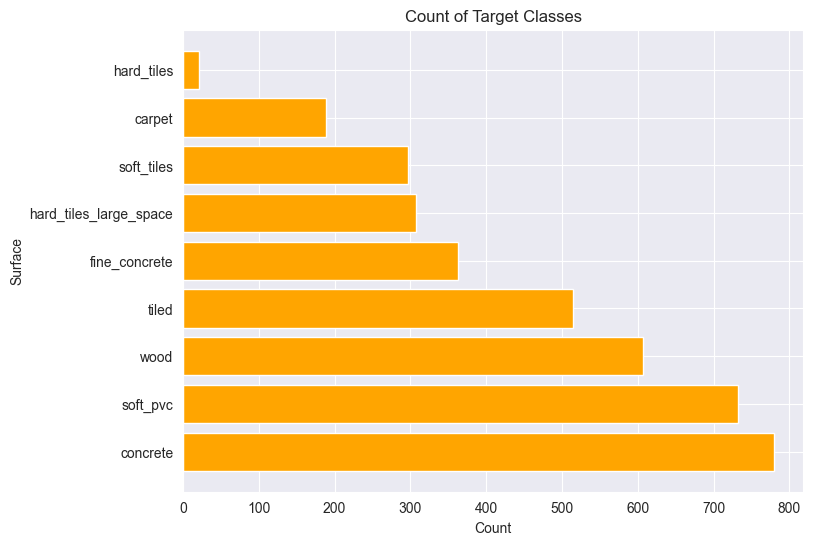

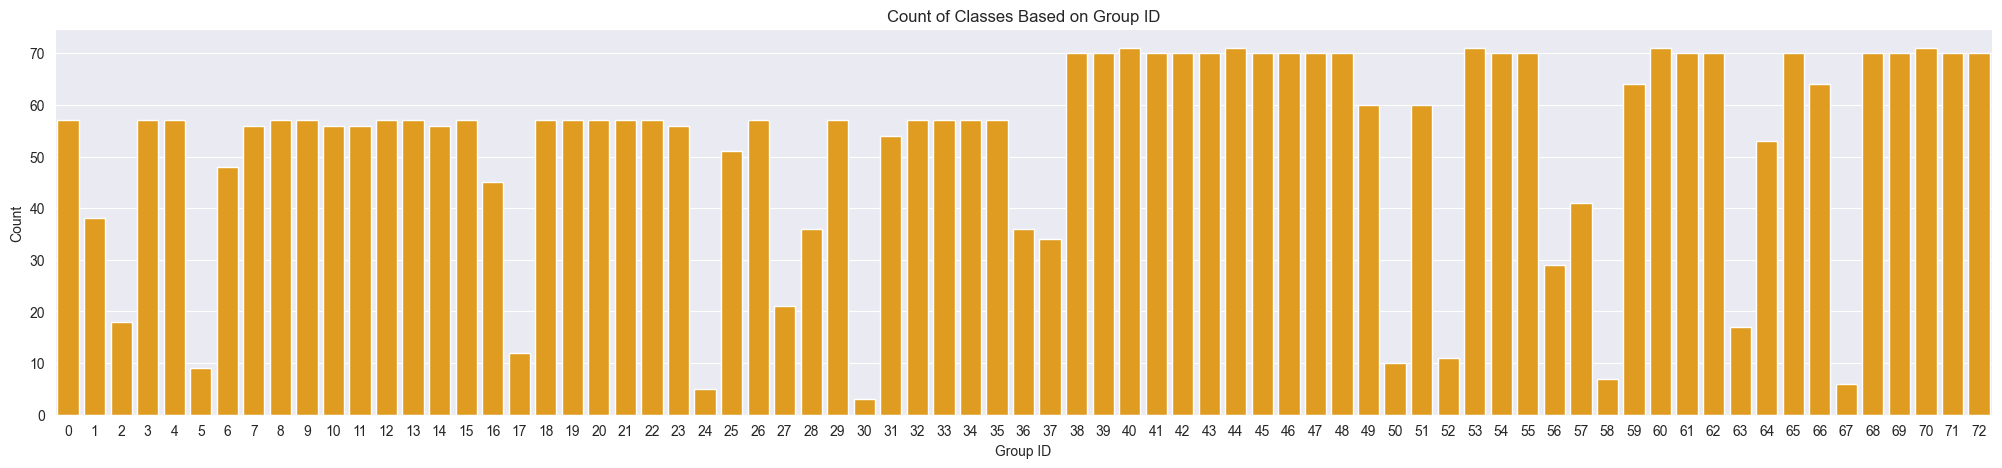

In [54]:
print(y_train.isnull().sum())
print(y_train.describe())
value_counts = y_train['surface'].value_counts()
plt.figure(figsize=(8, 6))
plt.barh(value_counts.index, value_counts.values, color='orange')
plt.xlabel('Count')
plt.ylabel('Surface')
plt.title('Count of Target Classes')
plt.show()


plt.figure(figsize=(25, 5))
sns.countplot(x='group_id', data=y_train, color='orange')
sns.despine()  # Remove top and right spines
plt.xlabel('Group ID')
plt.ylabel('Count')
plt.title('Count of Classes Based on Group ID')
plt.show()



In [82]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y_train.surface)
y_train["encoded"] = encoded_labels
y_train.head()




,series_id,group_id,surface,encoded
0,0,13,fine_concrete,2
1,1,31,concrete,1
2,2,20,concrete,1
3,3,31,concrete,1
4,4,22,soft_tiles,6


In [36]:
x_train_ungrouped = x_train[['series_id','orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W',
       'angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z',
       'linear_acceleration_X', 'linear_acceleration_Y',
       'linear_acceleration_Z']]

data_axis_1 = []
data_axis_0 = []
scaledList = []

y_list = []
i = 0
x_train_un = x_train_ungrouped.groupby("series_id")
series_label = []
for series_id , group in x_train_un:
#Adding label, surface mapping
    label = y_train[y_train.series_id == series_id].iloc[0].encoded
    surface = y_train[y_train.series_id == series_id].iloc[0].surface
    series_label.append([label,surface])

    group.drop(['series_id'], axis=1, inplace=True)
    group.reset_index(inplace = True, drop = True)
    y_list.append(label)
#Flattening data in two axis for data analysis on Horizontal 0 and Vertical 1 axis.
    data_axis_1.append(group.values.flatten())
    data_axis_0.append(group.values.flatten('F'))

    scaledList.append([surface,series_id,group,label])



y_list = np.array(y_list) # contains encoded labels
data_axis_1 = np.array(data_axis_1) # contains data
data_axis_0 = np.array(data_axis_0) #
print(y_list.shape, data_axis_1.shape, data_axis_0.shape)



(3810,) (3810, 1280) (3810, 1280)


In [55]:


X_train, X_test, y_train, y_test = train_test_split( data_axis_1, y_list, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test =  scaler.fit_transform(X_test)
# Standard Scaling preserves the relationship
# Min-max does not as it forces the scale between 0 to 1



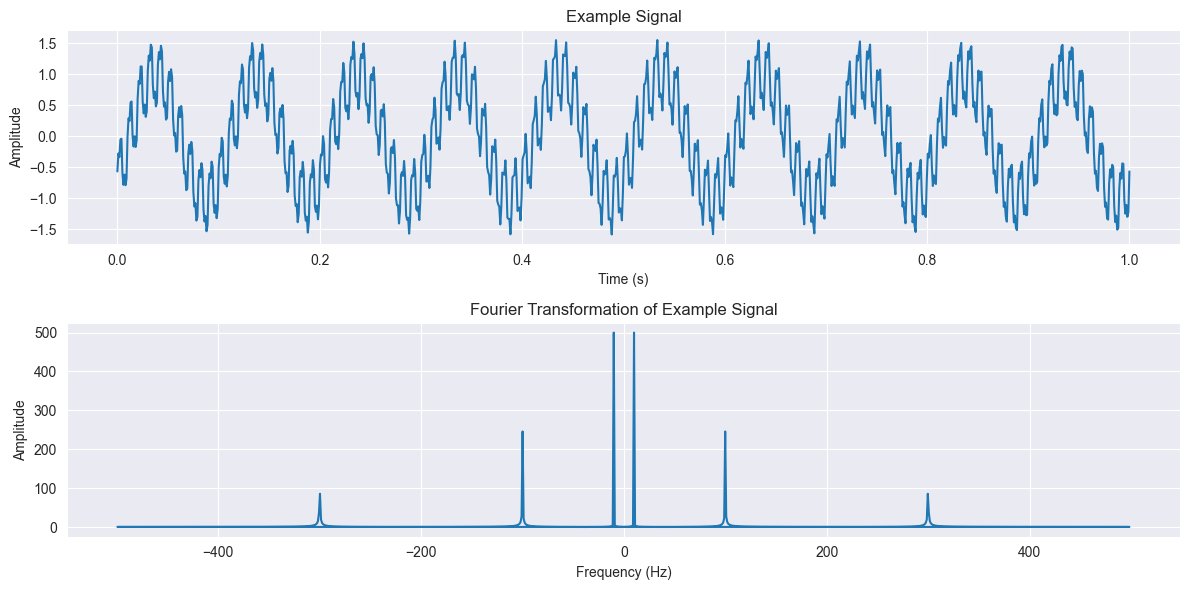

In [58]:
## TIME FREQUENCY visualization
time = np.linspace(0, 1, 1000)


freq1 = 10
freq2 = 100
freq3 = 300


amp1 = 1
amp2 = 0.5
amp3 = 0.2

phase = np.pi/4

example_signal = amp1 * np.sin(2 * np.pi * freq1 * time - phase) + amp2 * np.sin(2 * np.pi * freq2 * time) + amp3 * np.sin(2 * np.pi * freq3 * time + phase)


fft_result = np.fft.fft(example_signal)


frequencies = np.fft.fftfreq(len(time), d=time[1] - time[0])

#Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, example_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Example Signal')
plt.grid(True)

# Plot the Fourier transformation result
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of Example Signal')
plt.grid(True)

plt.tight_layout()
plt.show()


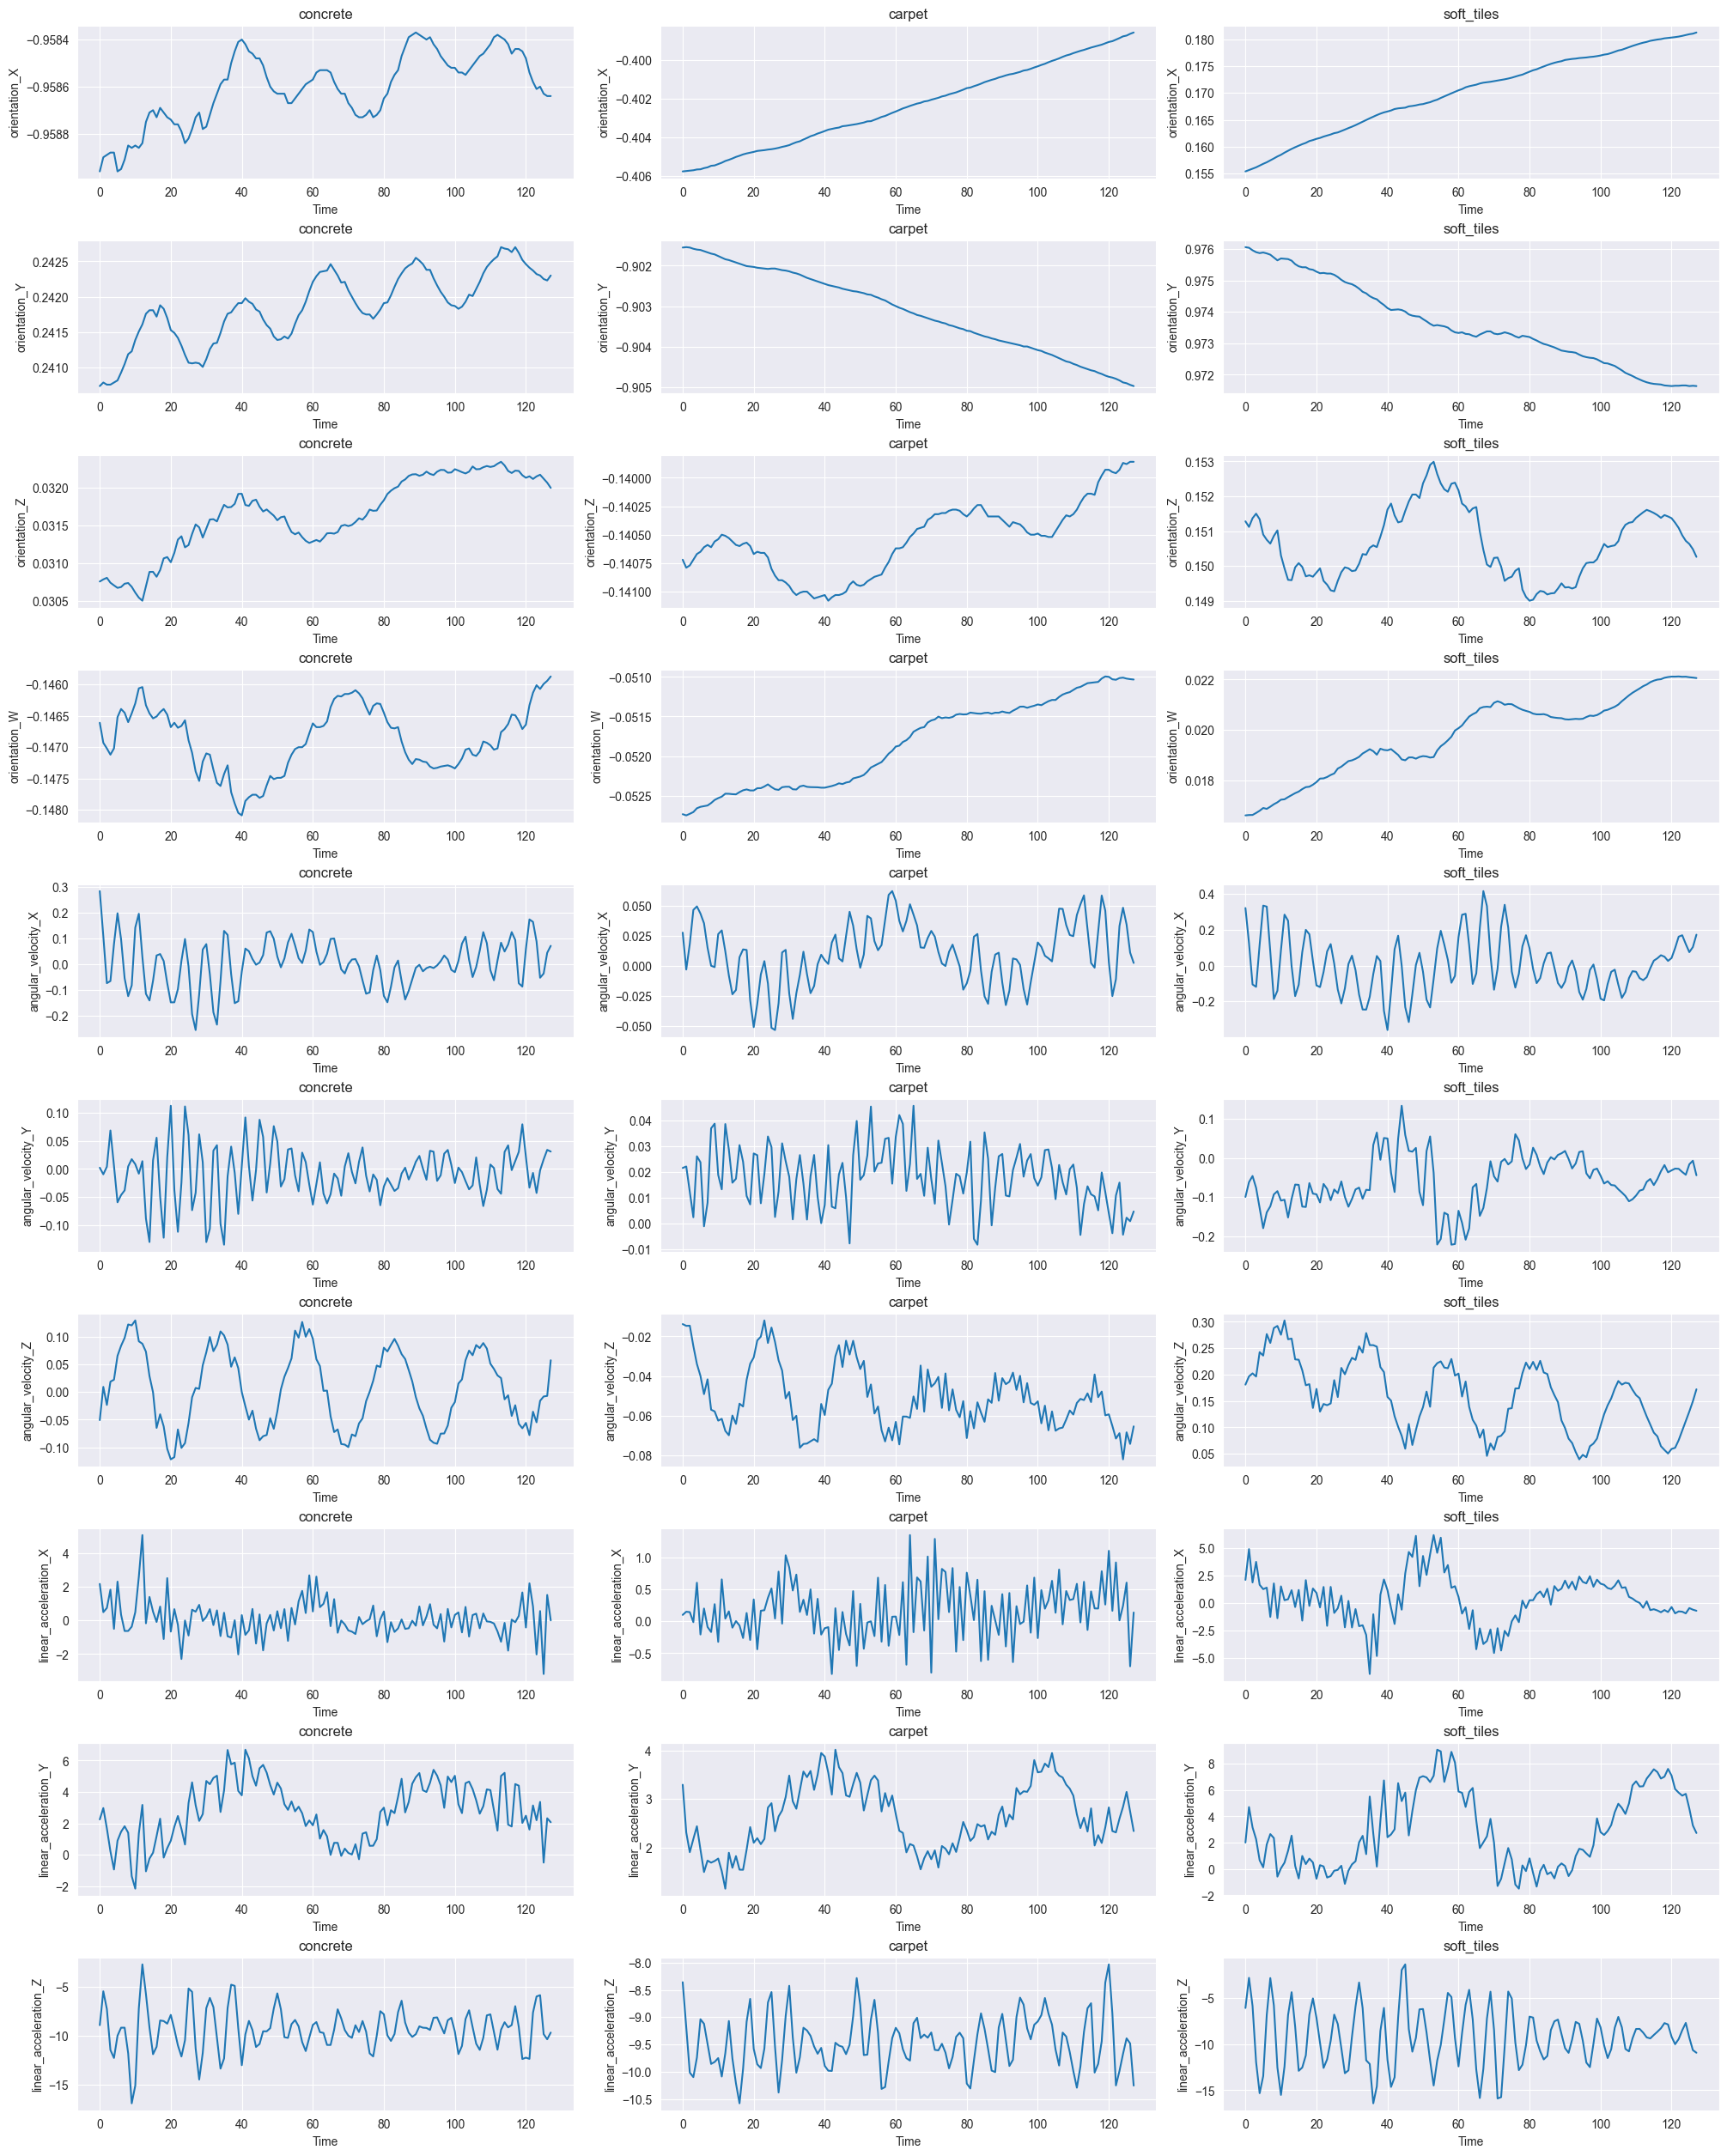

In [43]:
figure, axis = plt.subplots(10,3, figsize=(20,25), constrained_layout = True)
itr1 = 0
itr2 = 0
itr3 = 0
threshhold= 1
signal_concrete_super =  np.zeros(1280)
signal_carpet_super =  np.zeros(1280)
signal_fine_concrete_super = np.zeros(1280)
signal_concrete = np.zeros(128)
signal_carpet = np.zeros(128)
signal_fine_concrete = np.zeros(128)

for j in scaledList:
    if j[0] =='concrete' and itr1 < threshhold:
        signal_concrete_super +=  j[2].iloc[:,0:10].values.flatten() - np.mean(j[2].iloc[:,0:10].values.flatten())

        for i in range(10):
            if i == 7:

                signal_concrete +=  (j[2].iloc[:,i].values - np.mean(j[2].iloc[:,i].values.flatten()))
            axis[i][0].plot(j[2].iloc[:,i])
            axis[i][0].set_xlabel('Time')
            axis[i][0].set_ylabel(j[2].iloc[:,i].name)
            axis[i][0].set_title("concrete")
            plt.plot()
        itr1 += 1
    if j[0] =='soft_pvc' and  itr2 < threshhold:
        signal_carpet_super +=  j[2].iloc[:,0:10].values.flatten() - np.mean(j[2].iloc[:,0:10].values.flatten())

        for i in range(10):
            if i == 7:

                signal_carpet +=  (j[2].iloc[:,i].values - np.mean(j[2].iloc[:,i].values.flatten()))
            axis[i][1].plot(j[2].iloc[:,i])
            axis[i][1].set_xlabel('Time')
            axis[i][1].set_ylabel(j[2].iloc[:,i].name)
            axis[i][1].set_title("carpet")
            plt.plot()
        itr2 += 1
    if j[0] =='wood' and itr3 < threshhold:
        signal_fine_concrete_super +=  j[2].iloc[:,0:10].values.flatten() - np.mean(j[2].iloc[:,0:10].values.flatten())

        for i in range(10):

            if i == 7:

                signal_fine_concrete +=  (j[2].iloc[:,i].values - np.mean(j[2].iloc[:,i].values.flatten()))

            axis[i][2].plot(j[2].iloc[:,i])
            axis[i][2].set_xlabel('Time')
            axis[i][2].set_ylabel(j[2].iloc[:,i].name)
            axis[i][2].set_title("soft_tiles")
            plt.plot()
        itr3 += 1
    if itr1 == itr2== itr3 == threshhold:


        break


<StemContainer object of 3 artists>

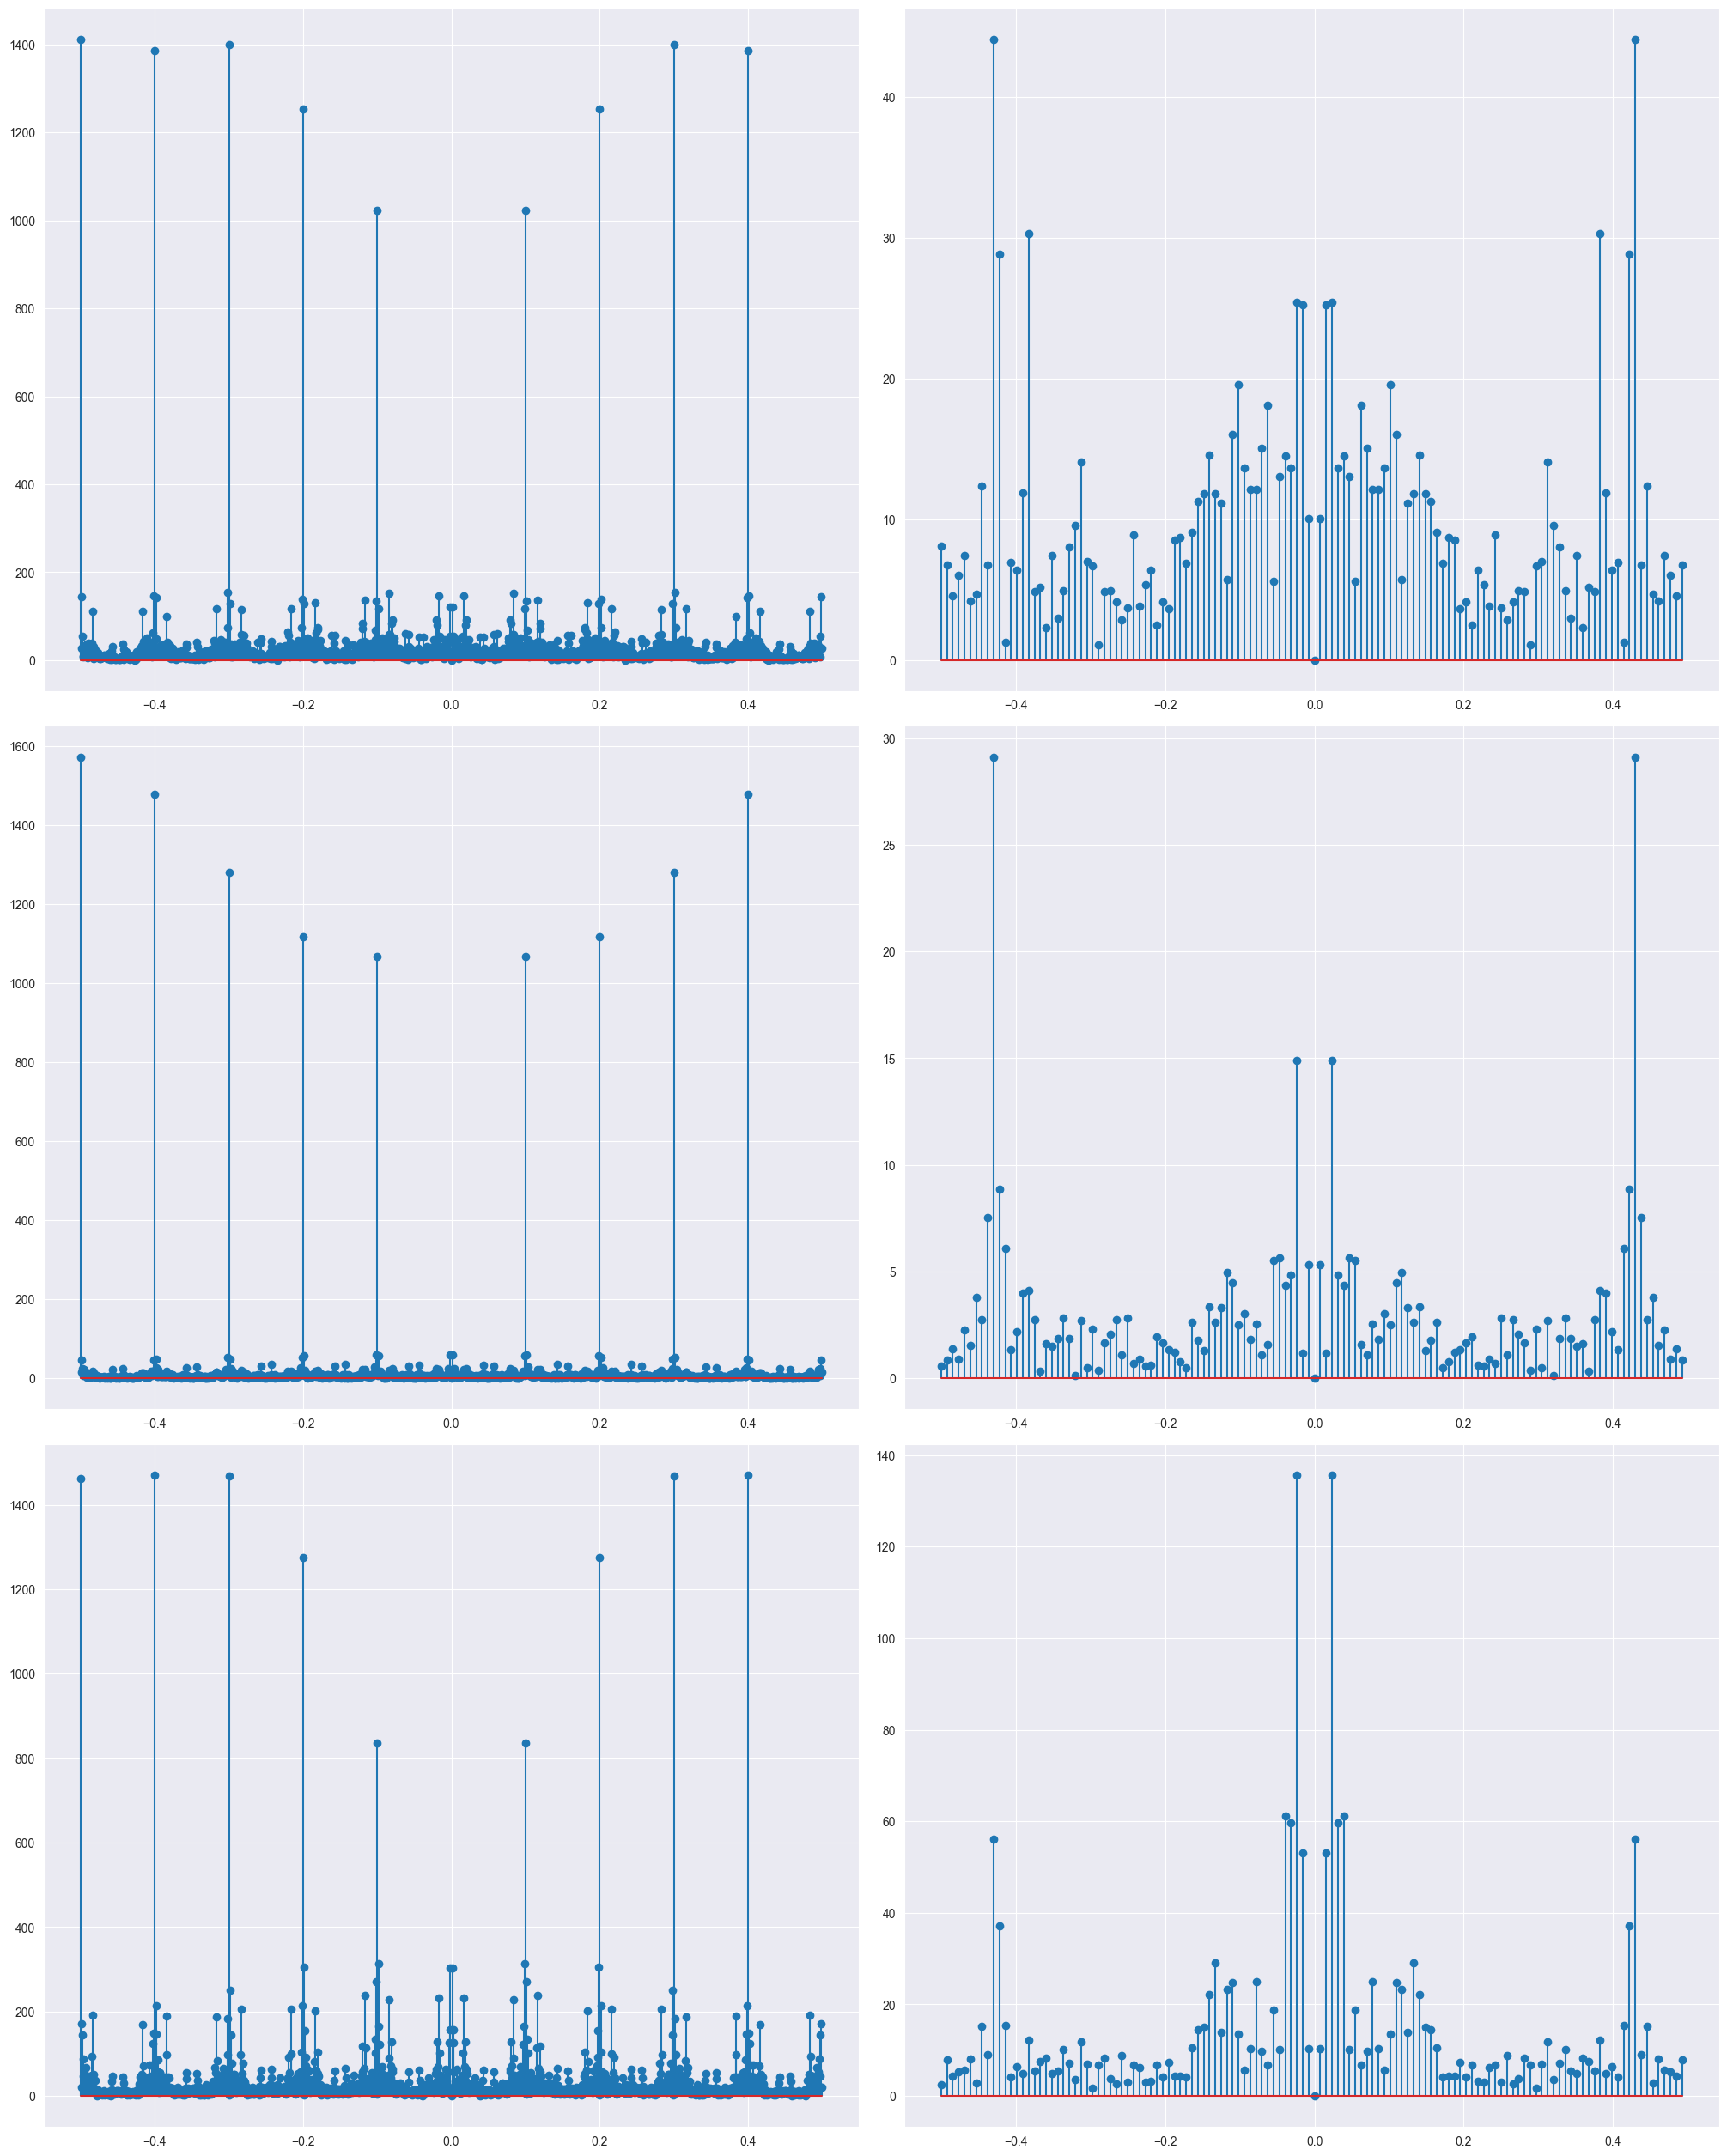

In [44]:
figure, axis = plt.subplots(3,2, figsize=(20,25), constrained_layout = True)
frequencies_s = np.fft.fftfreq(1280)
frequencies = np.fft.fftfreq(128)
axis[0,0].stem(frequencies_s, np.abs(np.fft.fft(signal_concrete_super)))
axis[0,1].stem(frequencies, np.abs(np.fft.fft(signal_concrete)))
axis[1,0].stem(frequencies_s, np.abs(np.fft.fft(signal_carpet_super)))
axis[1,1].stem(frequencies, np.abs(np.fft.fft(signal_carpet)))
axis[2,0].stem(frequencies_s, np.abs(np.fft.fft(signal_fine_concrete_super)))
axis[2,1].stem(frequencies, np.abs(np.fft.fft(signal_fine_concrete)))

C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Confusion Matrix:


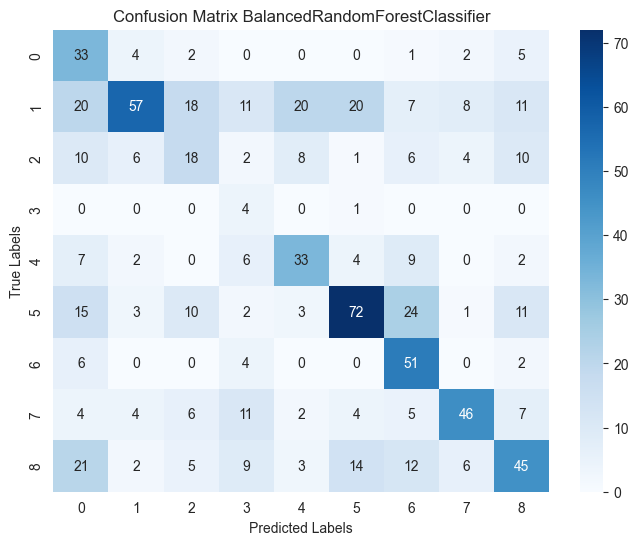

Accuracy: 0.47112860892388453
Precision (macro): 0.4572040339713437
Recall (macro): 0.5395430037488982
F1-score (macro): 0.43900430160892356


In [73]:
## Balanced Random Forest Model Setup
brf_model = BalancedRandomForestClassifier(n_estimators=100, max_depth=None, random_state=73)
## Model Training
brf_model.fit(X_train, y_train)
y_pred = brf_model.predict(X_test)

## Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
## Display the confusion matrix

print('Confusion Matrix:')

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix BalancedRandomForestClassifier')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision (macro):", precision_macro)
print("Recall (macro):", recall_macro)
print("F1-score (macro):", f1_macro)


In [71]:
## Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

## Evaluate the model with 'macro', 'micro', or 'weighted' average setting
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision (macro):", precision_macro)
print("Recall (macro):", recall_macro)
print("F1-score (macro):", f1_macro)

Accuracy: 0.2677165354330709
Precision (macro): 0.236511813658035
Recall (macro): 0.22686671624389257
F1-score (macro): 0.22708419550643436


Confusion Matrix RandomForestClassifier + SVC:


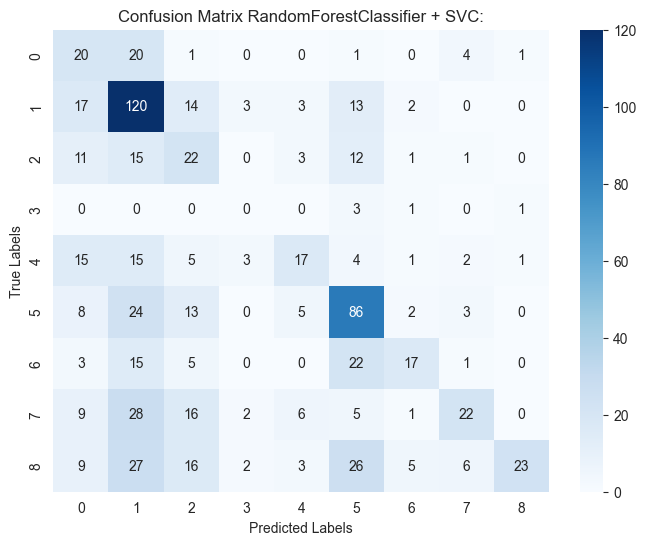

Accuracy: 0.42913385826771655
Precision (macro): 0.4572040339713437
Recall (macro): 0.5395430037488982
F1-score (macro): 0.43900430160892356


In [74]:
## Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(kernel='linear', C=1.0)

## Create a VotingClassifier
voting_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('svm', svm_classifier)], voting='hard')

## Train the VotingClassifier
voting_classifier.fit(X_train, y_train)

## Make predictions on the test set
y_pred = voting_classifier.predict(X_test)


confusion_mat = confusion_matrix(y_test, y_pred)
## Display the confusion matrix

print('Confusion Matrix RandomForestClassifier + SVC:')

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix RandomForestClassifier + SVC:')
plt.show()
## Evaluate the Updated model
accuracy = accuracy_score(y_test, y_pred)



print("Accuracy:", accuracy)
print("Precision (macro):", precision_macro)
print("Recall (macro):", recall_macro)
print("F1-score (macro):", f1_macro)

In [75]:

### NN MLP classifier
##Activation FUnction - Rectified Linear Unit -> Non linearity
## Avoiding Vanishing Gradient Problem, functions like sigmoid or tanh as it boosts to x even for small values
##Adaptive Moment Estimation): The Adam optimizer is an adaptive learning rate optimization algorithm that combines the benefits
##both the Adagrad and RMSProp optimizers. It's commonly used in neural networks, including MLPs, for various reasons:
## Momentum, Bias Correction

batch = 32
mlp_classifier = MLPClassifier(hidden_layer_sizes=(200,200 ), activation='relu', solver='adam',
                    max_iter=1000, early_stopping=True, n_iter_no_change=20, validation_fraction=0.2,
                    alpha=0.0001, verbose=True, batch_size=batch, random_state=200)

mlp_classifier1 = MLPClassifier(hidden_layer_sizes=(50,100 ), activation='relu', solver='adam',
                    max_iter=1000, early_stopping=True, n_iter_no_change=20, validation_fraction=0.2,
                    alpha=0.0001, verbose=True, batch_size=batch, random_state=150)

mlp_classifier2 = MLPClassifier(hidden_layer_sizes=(100,100 ), activation='relu', solver='adam',
                    max_iter=1000, early_stopping=True, n_iter_no_change=20, validation_fraction=0.2,
                    alpha=0.0001, verbose=True, batch_size=batch, random_state=100)

mlp_classifier3 = MLPClassifier(hidden_layer_sizes=(150,100 ), activation='relu', solver='adam',
                    max_iter=1000, early_stopping=True, n_iter_no_change=20, validation_fraction=0.2,
                    alpha=0.0001, verbose=True, batch_size=batch, random_state=300)

mlp_classifier4 = MLPClassifier(hidden_layer_sizes=(150,100 ), activation='relu', solver='adam',
                    max_iter=1000, early_stopping=True, n_iter_no_change=20, validation_fraction=0.2,
                    alpha=0.0001, verbose=True, batch_size=batch, random_state=4)

#voting classifier
voting_clf = VotingClassifier(estimators=[('mlp1', mlp_classifier), ('mlp2', mlp_classifier1),('mlp3', mlp_classifier2), ('mlp4', mlp_classifier3)], voting='hard')


In [76]:



# Train the Voting Ensemble



voting_clf.fit(X_train, y_train)
## automatically set to softmax


# Step 5: Model Training
mlp_classifier4.fit(X_train, y_train)

Iteration 1, loss = 1.84380008
Validation score: 0.434426
Iteration 2, loss = 1.32494979
Validation score: 0.480328
Iteration 3, loss = 1.10416842
Validation score: 0.498361
Iteration 4, loss = 0.94755889
Validation score: 0.455738
Iteration 5, loss = 0.81008981
Validation score: 0.475410
Iteration 6, loss = 0.69047333
Validation score: 0.518033
Iteration 7, loss = 0.66157668
Validation score: 0.514754
Iteration 8, loss = 0.59047555
Validation score: 0.527869
Iteration 9, loss = 0.47265000
Validation score: 0.522951
Iteration 10, loss = 0.39628902
Validation score: 0.529508
Iteration 11, loss = 0.39770180
Validation score: 0.526230
Iteration 12, loss = 0.41362048
Validation score: 0.516393
Iteration 13, loss = 0.37188633
Validation score: 0.522951
Iteration 14, loss = 0.32801213
Validation score: 0.540984
Iteration 15, loss = 0.34172317
Validation score: 0.513115
Iteration 16, loss = 0.30705791
Validation score: 0.544262
Iteration 17, loss = 0.22556252
Validation score: 0.519672
Iterat

MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=(150, 100),
              max_iter=1000, n_iter_no_change=20, random_state=4,
              validation_fraction=0.2, verbose=True)

In [77]:

# Step 6: Model Evaluation
y_pred_val_normal_msp = mlp_classifier4.predict(X_test)

accuracy_val_normal_msp = accuracy_score(y_test, y_pred_val_normal_msp)
print("Validation Accuracy for normal mlp classifier:", accuracy_val_normal_msp)

y_pred_val_voting_classifier = voting_clf.predict(X_test)
accuracy_val = accuracy_score(y_test, y_pred_val_voting_classifier)
print("Validation Accuracy for  mlp classifier with voting ensemble:", accuracy_val)




Validation Accuracy for normal mlp classifier: 0.5748031496062992
Validation Accuracy for  mlp classifier with voting ensemble: 0.631233595800525


Accuracy: 0.63
Confusion Matrix:


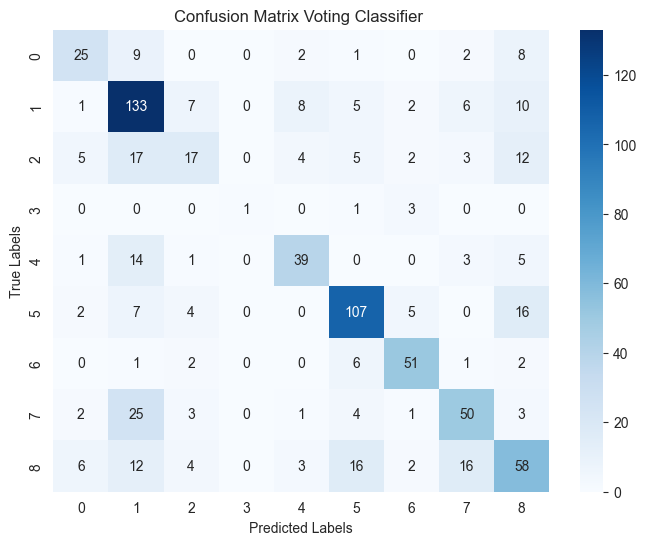

In [78]:


accuracy = accuracy_score(y_test, y_pred_val_voting_classifier)
conf_matrix = confusion_matrix(y_test, y_pred_val_voting_classifier)
precision = precision_score(y_test, y_pred_val_voting_classifier, average='macro')
recall = recall_score(y_test, y_pred_val_voting_classifier, average='macro')
f1 = f1_score(y_test, y_pred_val_voting_classifier, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
unique_labels = np.unique(np.concatenate((y_test, y_pred_val_voting_classifier)))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Voting Classifier ')
plt.show()

In [90]:




print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

##Perform K-Fold Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=cv)

print('Cross-Validation Scores:')
print(cv_scores)
print(f'Mean CV Score: {np.mean(cv_scores):.2f}')

Precision: 0.66
Recall: 0.56
F1 Score: 0.63


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\ensemble\_voting.py", line 336, in fit
    check_classification_targets(y)
  File "C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\utils\multiclass.py", line 210, in check_classification_targets
    y_type = type_of_target(y, input_name="y")
  File "C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\utils\multiclass.py", line 309, in type_of_target
    if is_multilabel(y):
  File "C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\utils\multiclass.py", line 169, in is_multilabel
    y = check_array(y, dtype=None, **check_y_kwargs)
  File "C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\torch\_tensor.py", line 970, in __array__
    return self.numpy()
TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.


In [83]:
# X should have shape (num_samples, num_timesteps, num_features)
# y should have shape (num_samples,)
x_train_ungrouped = x_train[['series_id','orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W',
       'angular_velocity_X', 'angular_velocity_Y', 'angular_velocity_Z',
       'linear_acceleration_X', 'linear_acceleration_Y',
       'linear_acceleration_Z']]

X_list = []
Y_list = []

for series_id , group in x_train_ungrouped.groupby("series_id"):

    label = y_train[y_train.series_id == series_id].iloc[0].encoded
    group.drop(['series_id'], axis=1, inplace=True)
    group.reset_index(inplace = True, drop = True)

    X_list.append(group.values.tolist())
    Y_list.append( label)


num_timesteps = len(X_list[0])
num_features = len(X_list[0][0])
print(num_features)

10


In [84]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_list),np.array(Y_list) , test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)

(2438, 128, 10)


In [85]:
batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # For multi-class classification, use dtype=torch.long
X_train, y_train = X_train_tensor.to(device), y_train_tensor.to(device)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
X_test, y_test = X_test_tensor.to(device), y_test_tensor.to(device)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_val, y_val = X_val_tensor.to(device), y_val_tensor.to(device)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [86]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the output from the last time step
        return out

# Step 4: Loss Function and Optimizer
input_size = num_features  # Number of features in your time series data
hidden_size = 256  # Adjust as needed
num_layers = 2  # Adjust as needed
num_classes = 9  # Number of classes for your classification task

model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

criterion = nn.CrossEntropyLoss()  # For multi-class classification, use nn.CrossEntropyLoss, uses nn.logsoftmax and nn.lllloss at last layer o that output tensor is the probablity of the loss (0,1)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate as needed

# Step 5: Training Loop
 # Adjust the number of epochs as needed
model.to(device)

LSTMClassifier(
  (lstm): LSTM(10, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=9, bias=True)
)

In [87]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
train_accuracies = []
train_losses = []
val_losses = []
val_accuracies = []
num_epochs = 120
for epoch in range(num_epochs):
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    for inputs, labels in train_loader:
        model.train()
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples


    # Append training loss and accuracy to the lists
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    val_predictions = []
    val_targets = []
    outputs = None
    labels = None
    with torch.no_grad():

        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            # Move the predicted tensor to the same device as the labels tensor
            predicted = predicted.to(labels.device)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_predictions.extend(predicted.cpu().numpy())
            val_targets.extend(labels.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct / total
        val_loss = criterion(outputs, labels).item()
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)


        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/120, Validation Loss: 1.9905, Validation Accuracy: 0.2262
Epoch 2/120, Validation Loss: 1.9275, Validation Accuracy: 0.2541
Epoch 3/120, Validation Loss: 1.8001, Validation Accuracy: 0.3180
Epoch 4/120, Validation Loss: 2.0188, Validation Accuracy: 0.1918
Epoch 5/120, Validation Loss: 1.9682, Validation Accuracy: 0.2213
Epoch 6/120, Validation Loss: 1.9356, Validation Accuracy: 0.2689
Epoch 7/120, Validation Loss: 1.9558, Validation Accuracy: 0.1869
Epoch 8/120, Validation Loss: 1.9767, Validation Accuracy: 0.2377
Epoch 9/120, Validation Loss: 1.7416, Validation Accuracy: 0.3148
Epoch 10/120, Validation Loss: 1.6227, Validation Accuracy: 0.3590
Epoch 11/120, Validation Loss: 1.5334, Validation Accuracy: 0.3885
Epoch 12/120, Validation Loss: 1.6039, Validation Accuracy: 0.3574
Epoch 13/120, Validation Loss: 1.4752, Validation Accuracy: 0.4115
Epoch 14/120, Validation Loss: 1.4736, Validation Accuracy: 0.4361
Epoch 15/120, Validation Loss: 1.5545, Validation Accuracy: 0.3902
Epoc

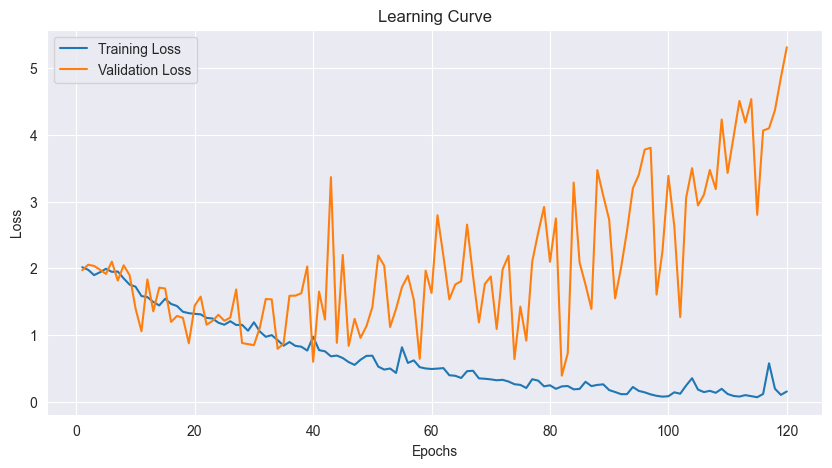

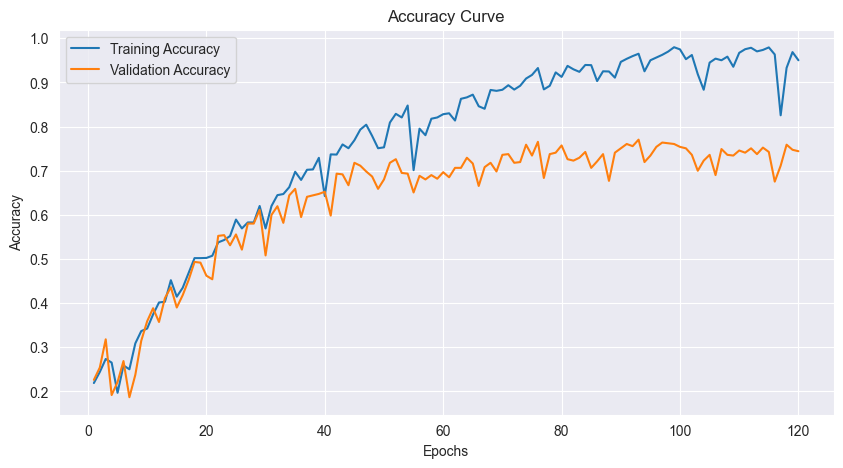

Test Accuracy: 0.7192
Test Precision: 0.6377, Test Recall: 0.6300
Test Confusion Matrix:


C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


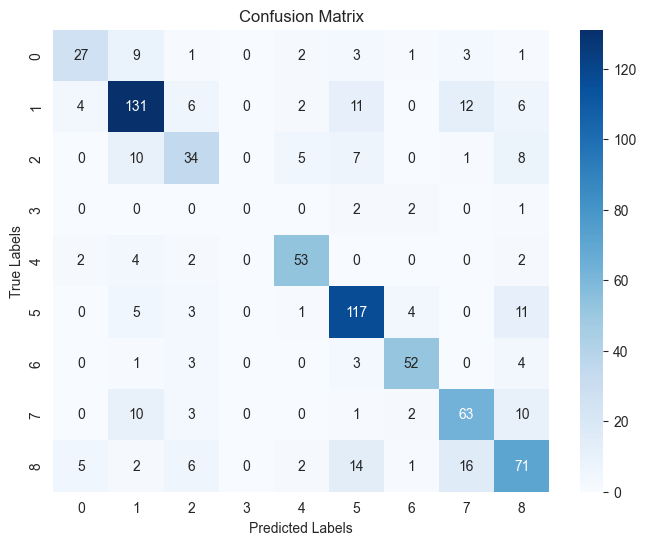

0.6324447191272808


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()

# Plotting the accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

model.eval()
test_correct_predictions = 0
test_total_samples = 0


test_predictions = []
test_targets = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)



        # Compute test accuracy
        _, test_predicted = torch.max(outputs, 1)
        test_correct_predictions += (test_predicted == labels).sum().item()
        test_total_samples += labels.size(0)
        test_predictions.extend(test_predicted.cpu().numpy())
        test_targets.extend(labels.cpu().numpy())



# Compute confusion matrix for test set
test_confusion_matrix = confusion_matrix(test_targets, test_predictions)
print('Test Confusion Matrix:')

unique_labels = np.unique(np.concatenate((test_targets, test_predictions)))
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC for test set











In [89]:
test_accuracy = test_correct_predictions / test_total_samples
print(f'Test Accuracy: {test_accuracy:.4f}')

test_precision = precision_score(test_targets, test_predictions, average='macro')
test_recall = recall_score(test_targets, test_predictions, average='macro')
print(f'Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}')
f1 = f1_score(test_targets, test_predictions, average='macro')
print(f1)

Test Accuracy: 0.7192
Test Precision: 0.6377, Test Recall: 0.6300
0.6324447191272808


C:\Users\amarp\.conda\envs\SMLProject\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample
import pandas as pd
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq =  0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Read the normalized WAV file


# Apply a bandpass filter to isolate the voice
lowcut = 80.0
highcut = 3500.0
target_fs = 8000




base_dir = 'C:\\Users\\amarp\\Downloads\\train\\train\\audio'

# Initialize an empty list to store data
data = []
dat = []
label = []

# Loop through each folder in the base directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    print(folder_path)

    # Check if the current path is indeed a folder
    if os.path.isdir(folder_path):

        # Loop through each file in the folder
        count = 0

        for filename in os.listdir(folder_path):
            print(filename)
            if (count == 100):
                break
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)

            if(".wav" in filename):

                sample_rate, samples = wavfile.read(file_path)
                if(len(samples) == 16000) :
                    count += 1
                    voice_filtered = butter_bandpass_filter(samples, lowcut, highcut, sample_rate, order=6)
                    num_samples = round(len(voice_filtered) * float(target_fs) / sample_rate)

        # Resample the data
                    new_samples = resample(voice_filtered, num_samples)
                    new_samples = new_samples / np.max(np.abs(new_samples),axis=0)
                    print(len(new_samples))

                    # Append the folder name (label) and file path (feature) to the list
                    dat.append([new_samples])
                    label.append(folder)
                    data.append({'Label': folder, 'Samples': new_samples})


C:\Users\amarp\Downloads\train\train\audio\bed
00176480_nohash_0.wav
8000
004ae714_nohash_0.wav
8000
004ae714_nohash_1.wav
00f0204f_nohash_0.wav
8000
00f0204f_nohash_1.wav
8000
012c8314_nohash_0.wav
8000
012c8314_nohash_1.wav
8000
0132a06d_nohash_0.wav
8000
0135f3f2_nohash_0.wav
8000
0137b3f4_nohash_0.wav
8000
014f9f65_nohash_0.wav
01648c51_nohash_0.wav
8000
01648c51_nohash_1.wav
8000
016e2c6d_nohash_0.wav
8000
01b4757a_nohash_0.wav
8000
01b4757a_nohash_1.wav
01bcfc0c_nohash_0.wav
8000
0227998e_nohash_0.wav
026290a7_nohash_0.wav
8000
02746d24_nohash_0.wav
8000
035de8fe_nohash_0.wav
8000
0362539c_nohash_0.wav
8000
0362539c_nohash_1.wav
037c445a_nohash_0.wav
8000
0397ecda_nohash_0.wav
8000
03c96658_nohash_0.wav
8000
042186b8_nohash_0.wav
8000
042ea76c_nohash_0.wav
8000
0447d7c1_nohash_0.wav
8000
0474c92a_nohash_0.wav
0474c92a_nohash_1.wav
8000
05739450_nohash_0.wav
05b2db80_nohash_0.wav
8000
05d18852_nohash_0.wav
8000
06076b6b_nohash_0.wav
8000
060cd039_nohash_0.wav
8000
060cd039_nohash_

C:\Users\amarp\AppData\Local\Temp\ipykernel_126392\2435366978.py:62: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(file_path)


     Label                                            Samples
0      bed  [0.00016222597535353746, 1.6101062295392464e-0...
1      bed  [-0.0010379970453039853, -0.003918610238508732...
2      bed  [-0.0007980113154427402, -0.001005463728040102...
3      bed  [-0.0019468190418086002, -0.001140577905224177...
4      bed  [-0.00021122007398700996, 0.028521401543431923...
...    ...                                                ...
2995  zero  [-0.0057708360926106836, -0.001054953083392802...
2996  zero  [0.0008132486399942937, 0.0026733506117487885,...
2997  zero  [-0.001327447341382404, -0.003645591394474381,...
2998  zero  [0.002266260827228394, -0.0029035698123412675,...
2999  zero  [0.0007711611680426733, -0.011017273935786902,...

[3000 rows x 2 columns]


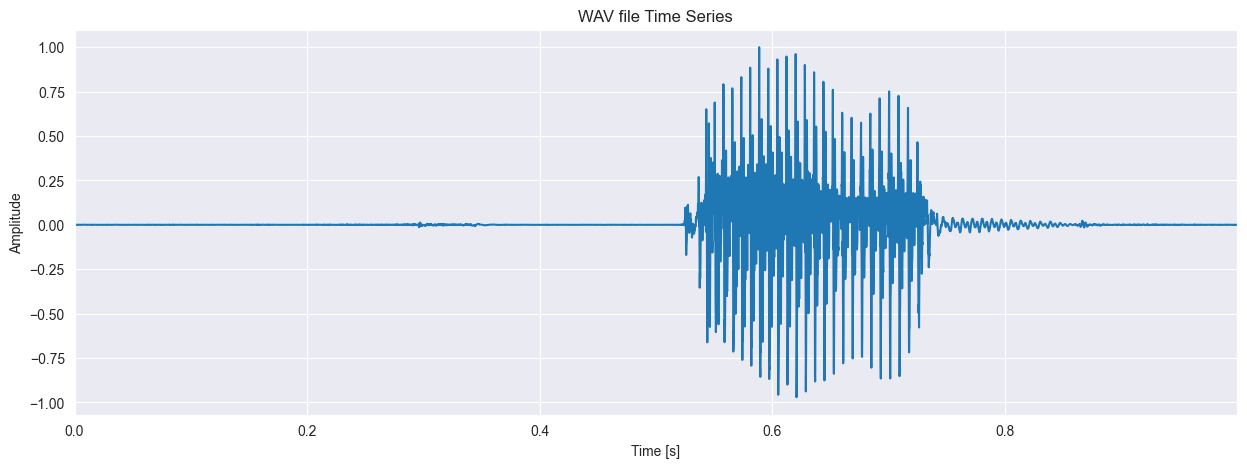

In [2]:

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)
print(df)
samples = df['Samples'][0]
sample_rate = target_fs
# Read the WAV file





# Create the time axis for the samples
times = np.arange(len(samples)) / sample_rate

# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(times, samples)
plt.title('WAV file Time Series')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.xlim(0, times[-1])
plt.show()

In [7]:
import IPython.display as ipd
import time


print(df['Label'][2999])
samples = df['Samples'][2999]
scaled_samples = np.int16(samples * 32767)

# Write the scaled data to a 16-bit WAV file
wavfile.write('output.wav', sample_rate, scaled_samples)

audio_file = './output.wav'


#Display an audio widget to play sound in an IPython notebook


ipd.Audio(audio_file, autoplay=True)



zero


In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder





encoder1 = LabelEncoder()
encoded_labels = encoder1.fit_transform(label)



X = np.array(dat)


In [66]:

# y shape should be (num_samples, 1) for binary classification

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, y_train.shape


((1920, 1, 8000), (1920,))

In [68]:

batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [69]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # For multi-class classification, use dtype=torch.long
X_train, y_train = X_train_tensor.to(device), y_train_tensor.to(device)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
X_test, y_test = X_test_tensor.to(device), y_test_tensor.to(device)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_val, y_val = X_val_tensor.to(device), y_val_tensor.to(device)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [73]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the output from the last time step
        return out

# Step 4: Loss Function and Optimizer
input_size = 8000  # Number of features in your time series data
hidden_size = 256  # Adjust as needed
num_layers = 2  # Adjust as needed
num_classes = 32  # Number of classes for your classification task

model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

criterion = nn.CrossEntropyLoss()  # For multi-class classification, use nn.CrossEntropyLoss, uses nn.logsoftmax and nn.lllloss at last layer o that output tensor is the probablity of the loss (0,1)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate as needed

# Step 5: Training Loop
 # Adjust the number of epochs as needed
model.to(device)

LSTMClassifier(
  (lstm): LSTM(8000, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=32, bias=True)
)

In [74]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
train_accuracies = []
train_losses = []
val_losses = []
val_accuracies = []
num_epochs = 120
for epoch in range(num_epochs):
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    for inputs, labels in train_loader:
        model.train()
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples


    # Append training loss and accuracy to the lists
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    val_predictions = []
    val_targets = []
    outputs = None
    labels = None
    with torch.no_grad():

        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            # Move the predicted tensor to the same device as the labels tensor
            predicted = predicted.to(labels.device)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_predictions.extend(predicted.cpu().numpy())
            val_targets.extend(labels.cpu().numpy())

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct / total
        val_loss = criterion(outputs, labels).item()
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)


        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/120, Validation Loss: 3.4499, Validation Accuracy: 0.0312
Epoch 2/120, Validation Loss: 3.5112, Validation Accuracy: 0.0542
Epoch 3/120, Validation Loss: 4.6530, Validation Accuracy: 0.0500
Epoch 4/120, Validation Loss: 5.0591, Validation Accuracy: 0.0500
Epoch 5/120, Validation Loss: 5.2016, Validation Accuracy: 0.0500
Epoch 6/120, Validation Loss: 5.2949, Validation Accuracy: 0.0458
Epoch 7/120, Validation Loss: 5.3741, Validation Accuracy: 0.0458
Epoch 8/120, Validation Loss: 5.4385, Validation Accuracy: 0.0458
Epoch 9/120, Validation Loss: 5.4966, Validation Accuracy: 0.0479
Epoch 10/120, Validation Loss: 5.5509, Validation Accuracy: 0.0479
Epoch 11/120, Validation Loss: 5.5985, Validation Accuracy: 0.0479
Epoch 12/120, Validation Loss: 5.6433, Validation Accuracy: 0.0458
Epoch 13/120, Validation Loss: 5.6859, Validation Accuracy: 0.0458
Epoch 14/120, Validation Loss: 5.7251, Validation Accuracy: 0.0458
Epoch 15/120, Validation Loss: 5.7612, Validation Accuracy: 0.0458
Epoc

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x32 and 256x29)